<a href="https://colab.research.google.com/github/jeremysiji/SCDV-FlightDelay/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import Data

In [ ]:
!gdown --id 1zQeXiTV0I2IOKqfiIMz-ntD17dXtb3af -O Airline_Delay_Causes.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zQeXiTV0I2IOKqfiIMz-ntD17dXtb3af
To: /content/Airline_Delay_Causes.csv
100% 23.5M/23.5M [00:00<00:00, 52.0MB/s]


In [ ]:
dfm = pd.read_csv('/content/Airline_Delay_Causes.csv')

#Data Cleansing and Data Parsing

In [ ]:
dfm.head()
dfm.shape

(140875, 21)

In [ ]:
dfm.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [ ]:
dfm['year'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018])

In [ ]:
dfm['month'].unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [ ]:
# prompt: code to find out how many unique airports are there as a count
unique_airports_count = dfm['carrier_name'].unique()
print(len(unique_airports_count))

28


#Data Exploration and Data Parsing

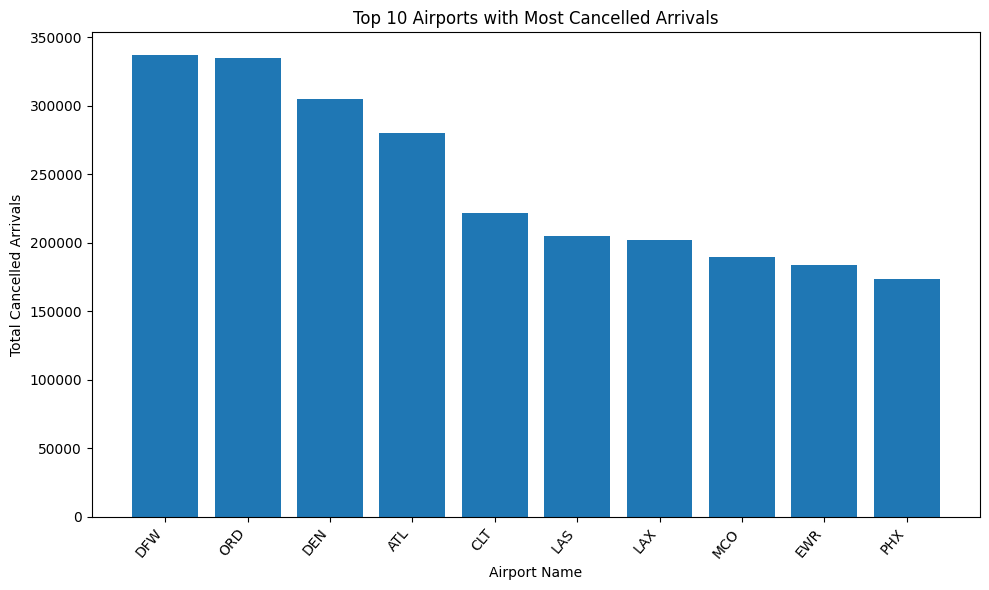

In [ ]:
# prompt: create a barplot plot with the group by airport and the arr_cancelled the top 10
# Assuming data_24 is your DataFrame
airport_cancelled = data_24.groupby('airport')['arr_del15'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(airport_cancelled.index, airport_cancelled.values)
plt.xlabel('Airport Name')
plt.ylabel('Total Cancelled Arrivals')
plt.title('Top 10 Airports with Most Cancelled Arrivals')
plt.xticks(rotation=50, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
# prompt: a slider using jupyter widgets

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Calculate unique_airports_count here
unique_airports_count = data_24['airport'].unique()  # Assuming you want unique airports, not carriers

# Create a slider widget
slider = widgets.IntSlider(
    value=10,
    min=1,
    max=len(unique_airports_count),
    step=1,
    description='Top N Airports:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# Function to update the plot based on the slider value
def update_plot(change):
    n_airports = change.new
    airport_cancelled = data_24.groupby('airport')['arr_del15'].sum().sort_values(ascending=False).head(n_airports)

    plt.figure(figsize=(10, 6))
    plt.bar(airport_cancelled.index, airport_cancelled.values)
    plt.xlabel('Airport Name')
    plt.ylabel('Total Cancelled Arrivals')
    plt.title(f'Top {n_airports} Airports with Most Cancelled Arrivals')
    plt.xticks(rotation=50, ha='right')
    plt.tight_layout()
    plt.show()


# Observe the slider for changes and call the update_plot function
slider.observe(update_plot, names='value')

# Display the slider
display(slider)

IntSlider(value=10, continuous_update=False, description='Top N Airports:', max=388, min=1)

In [ ]:
# prompt: a slider using jupyter widgets

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Create a slider widget
slider = widgets.IntSlider(
    value=10,
    min=1,
    max=len(unique_airports_count),
    step=1,
    description='Top N Airports:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# Function to update the plot based on the slider value
def update_plot(change):
    n_airports = change.new
    airport_cancelled = data_24.groupby('airport')['arr_del15'].sum().sort_values(ascending=False).head(n_airports)

    plt.figure(figsize=(10, 6))
    plt.bar(airport_cancelled.index, airport_cancelled.values)
    plt.xlabel('Airport Name')
    plt.ylabel('Total Cancelled Arrivals')
    plt.title(f'Top {n_airports} Airports with Most Cancelled Arrivals')
    plt.xticks(rotation=50, ha='right')
    plt.tight_layout()
    plt.show()


# Observe the slider for changes and call the update_plot function
slider.observe(update_plot, names='value')

# Display the slider
display(slider)



IntSlider(value=10, continuous_update=False, description='Top N Airports:', max=388, min=1)

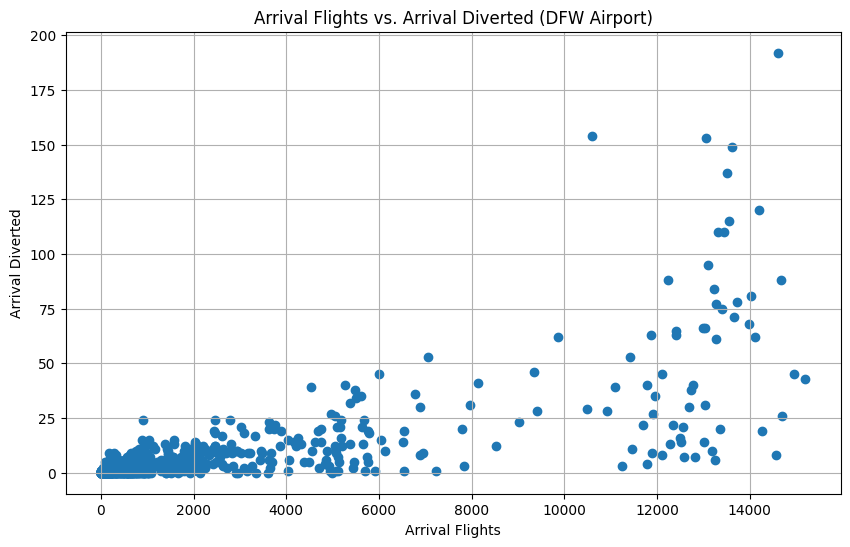

In [ ]:
# prompt: Give me a code to filter on dfw airport and generate a scatter plot with the the arrival flights  and the arr_diverted

import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_24 is your DataFrame and is already loaded
# ... (your existing code to load the data)

# Filter for dfw airport
dfw_data = data_24[data_24['airport'] == 'DFW']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dfw_data['arr_flights'], dfw_data['arr_diverted'])
plt.xlabel('Arrival Flights')
plt.ylabel('Arrival Diverted')
plt.title('Arrival Flights vs. Arrival Diverted (DFW Airport)')
plt.grid(True)
plt.show()


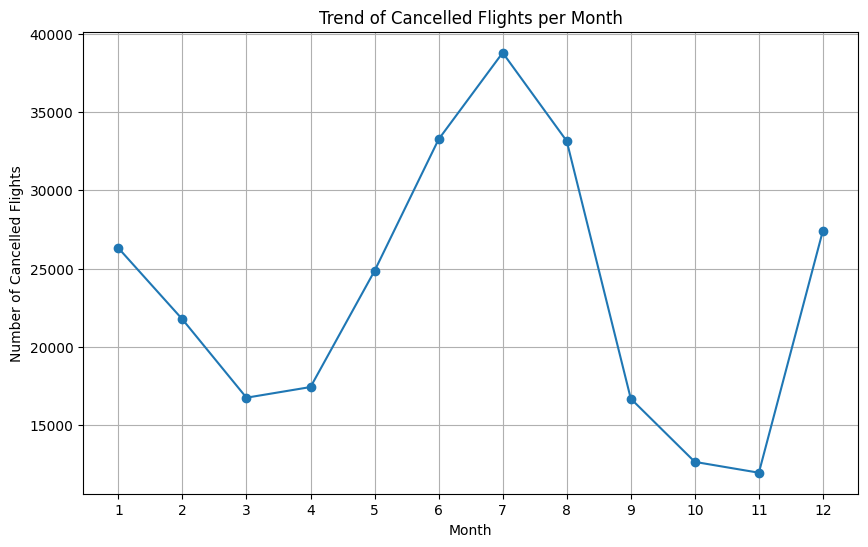

In [ ]:
# prompt: Give me a lineplot code to plot the canceled flights with the month to see the trend

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Month' column exists and 'Cancelled' column represents cancelled flights
# Replace 'Cancelled' with the actual column name if different

monthly_cancellations = data_24.groupby('month')['weather_ct'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Flights')
plt.title('Trend of Cancelled Flights per Month')
plt.grid(True)
# Set x-axis ticks to be from 1 to 12
plt.xticks(range(1, 13))
plt.show()
plt.show()



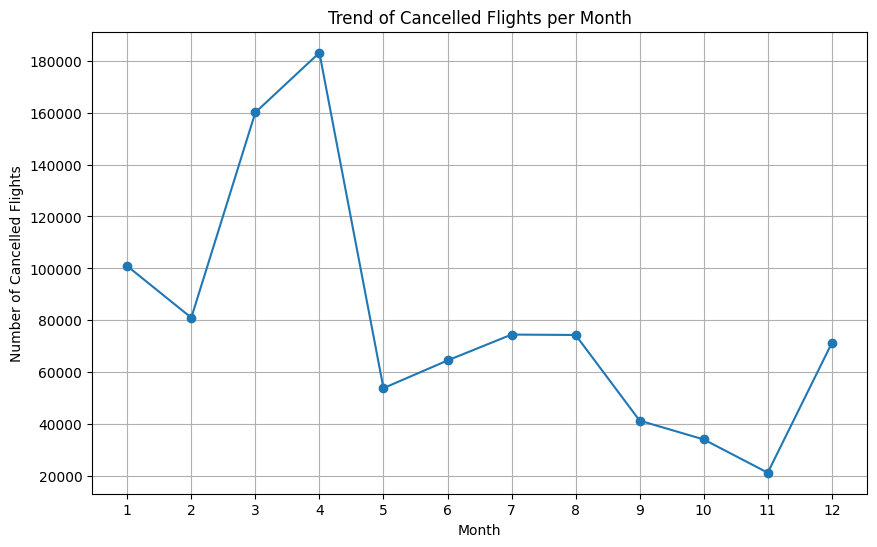

In [ ]:
# prompt: Give me a lineplot code to plot the canceled flights with the month to see the trend

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Month' column exists and 'Cancelled' column represents cancelled flights
# Replace 'Cancelled' with the actual column name if different


monthly_cancellations = data_24.groupby('month')['arr_cancelled'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Flights')
plt.title('Trend of Cancelled Flights per Month')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

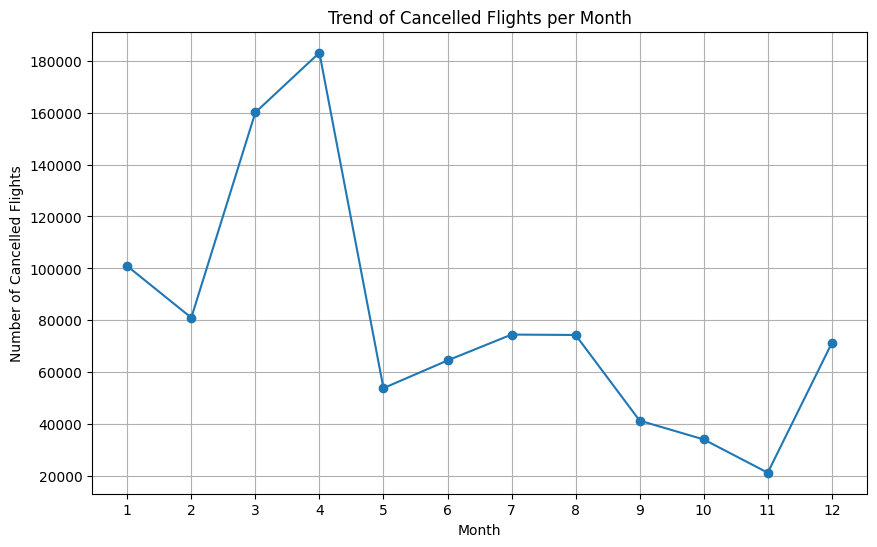

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'month' and sum 'arr_cancelled'
monthly_cancellations = data_24.groupby('month')['arr_cancelled'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Flights')
plt.title('Trend of Cancelled Flights per Month')
plt.grid(True)

# Set x-axis ticks to be from 1 to 12
plt.xticks(range(1, 13))

plt.show()

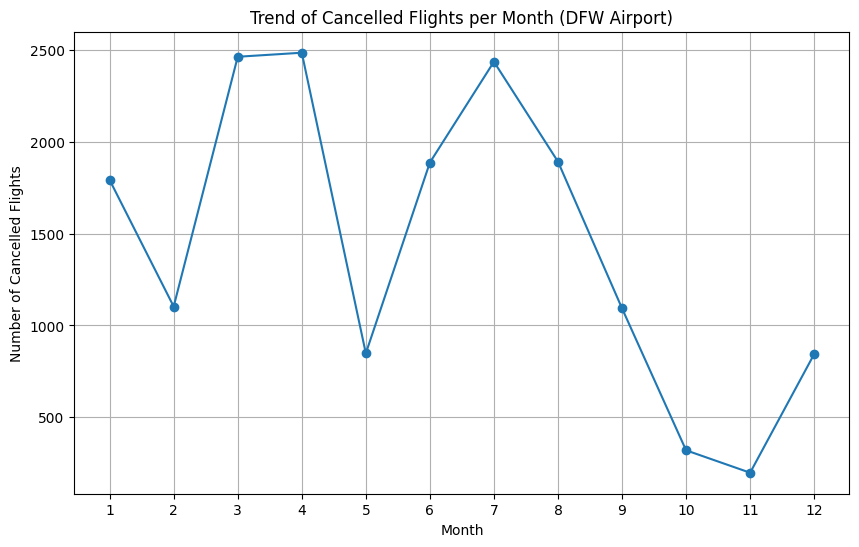

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for DFW airport
dfw_data = data_24[data_24['airport'] == 'JFK']

# Group by 'month' and sum 'arr_cancelled' for DFW
monthly_cancellations_dfw = dfw_data.groupby('month')['arr_cancelled'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_cancellations_dfw.index, monthly_cancellations_dfw.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Flights')
plt.title('Trend of Cancelled Flights per Month (DFW Airport)')
plt.grid(True)

# Set x-axis ticks to be from 1 to 12
plt.xticks(range(1, 13))

plt.show()

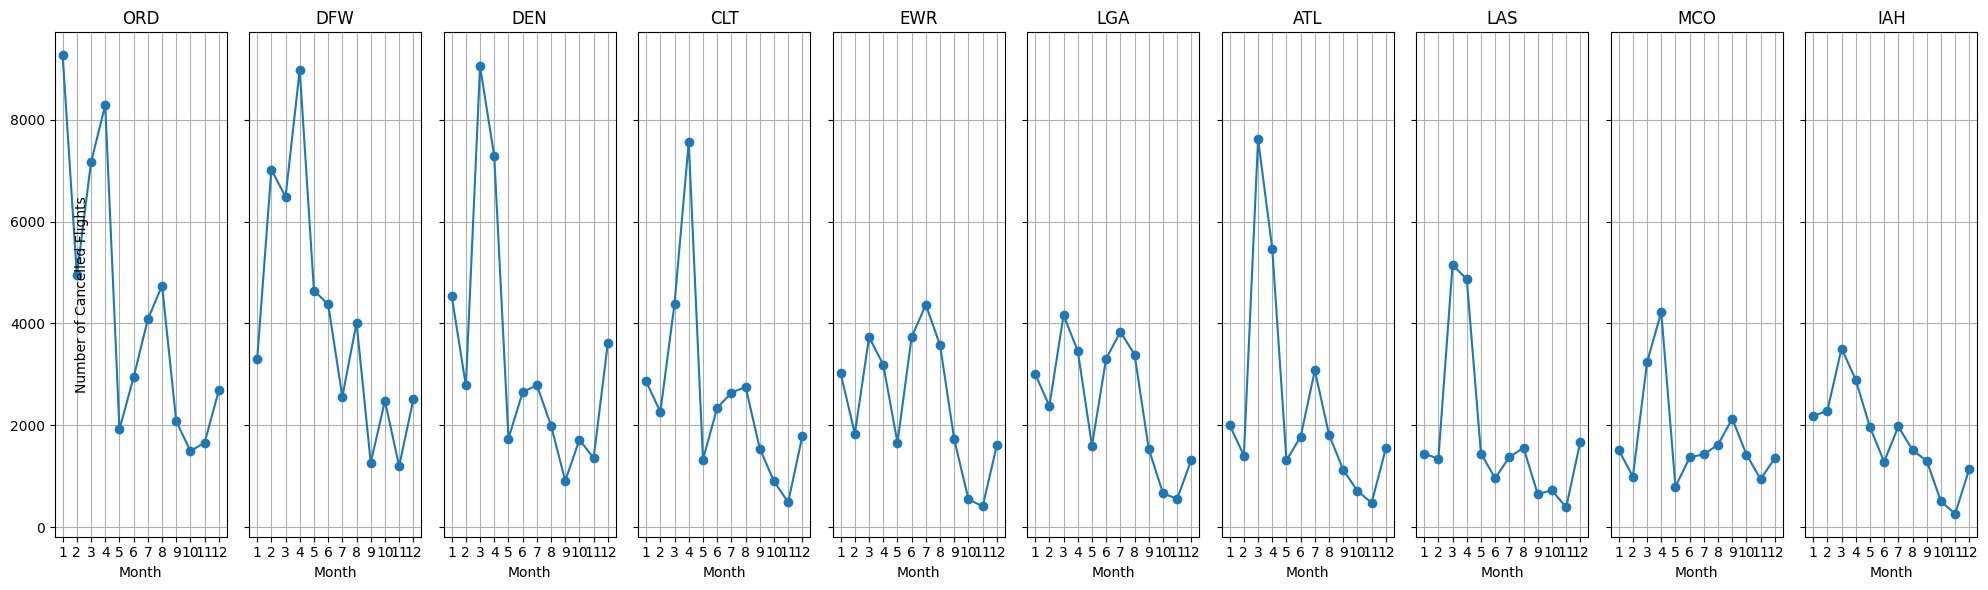

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 10 worst airports
worst_airports = data_24.groupby('airport')['arr_cancelled'].sum().sort_values(ascending=False).head(10).index

# Create subplots
fig, axes = plt.subplots(1, 10, figsize=(20, 6), sharey=True)  # 1 row, 10 columns

# Iterate through worst airports and plot
for i, airport in enumerate(worst_airports):
    airport_data = data_24[data_24['airport'] == airport]
    monthly_cancellations = airport_data.groupby('month')['arr_cancelled'].sum()

    axes[i].plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
    axes[i].set_xlabel('Month')
    axes[i].set_title(airport)
    axes[i].grid(True)
    axes[i].set_xticks(range(1, 13))

# Set common y-axis label
fig.text(0.04, 0.5, 'Number of Cancelled Flights', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

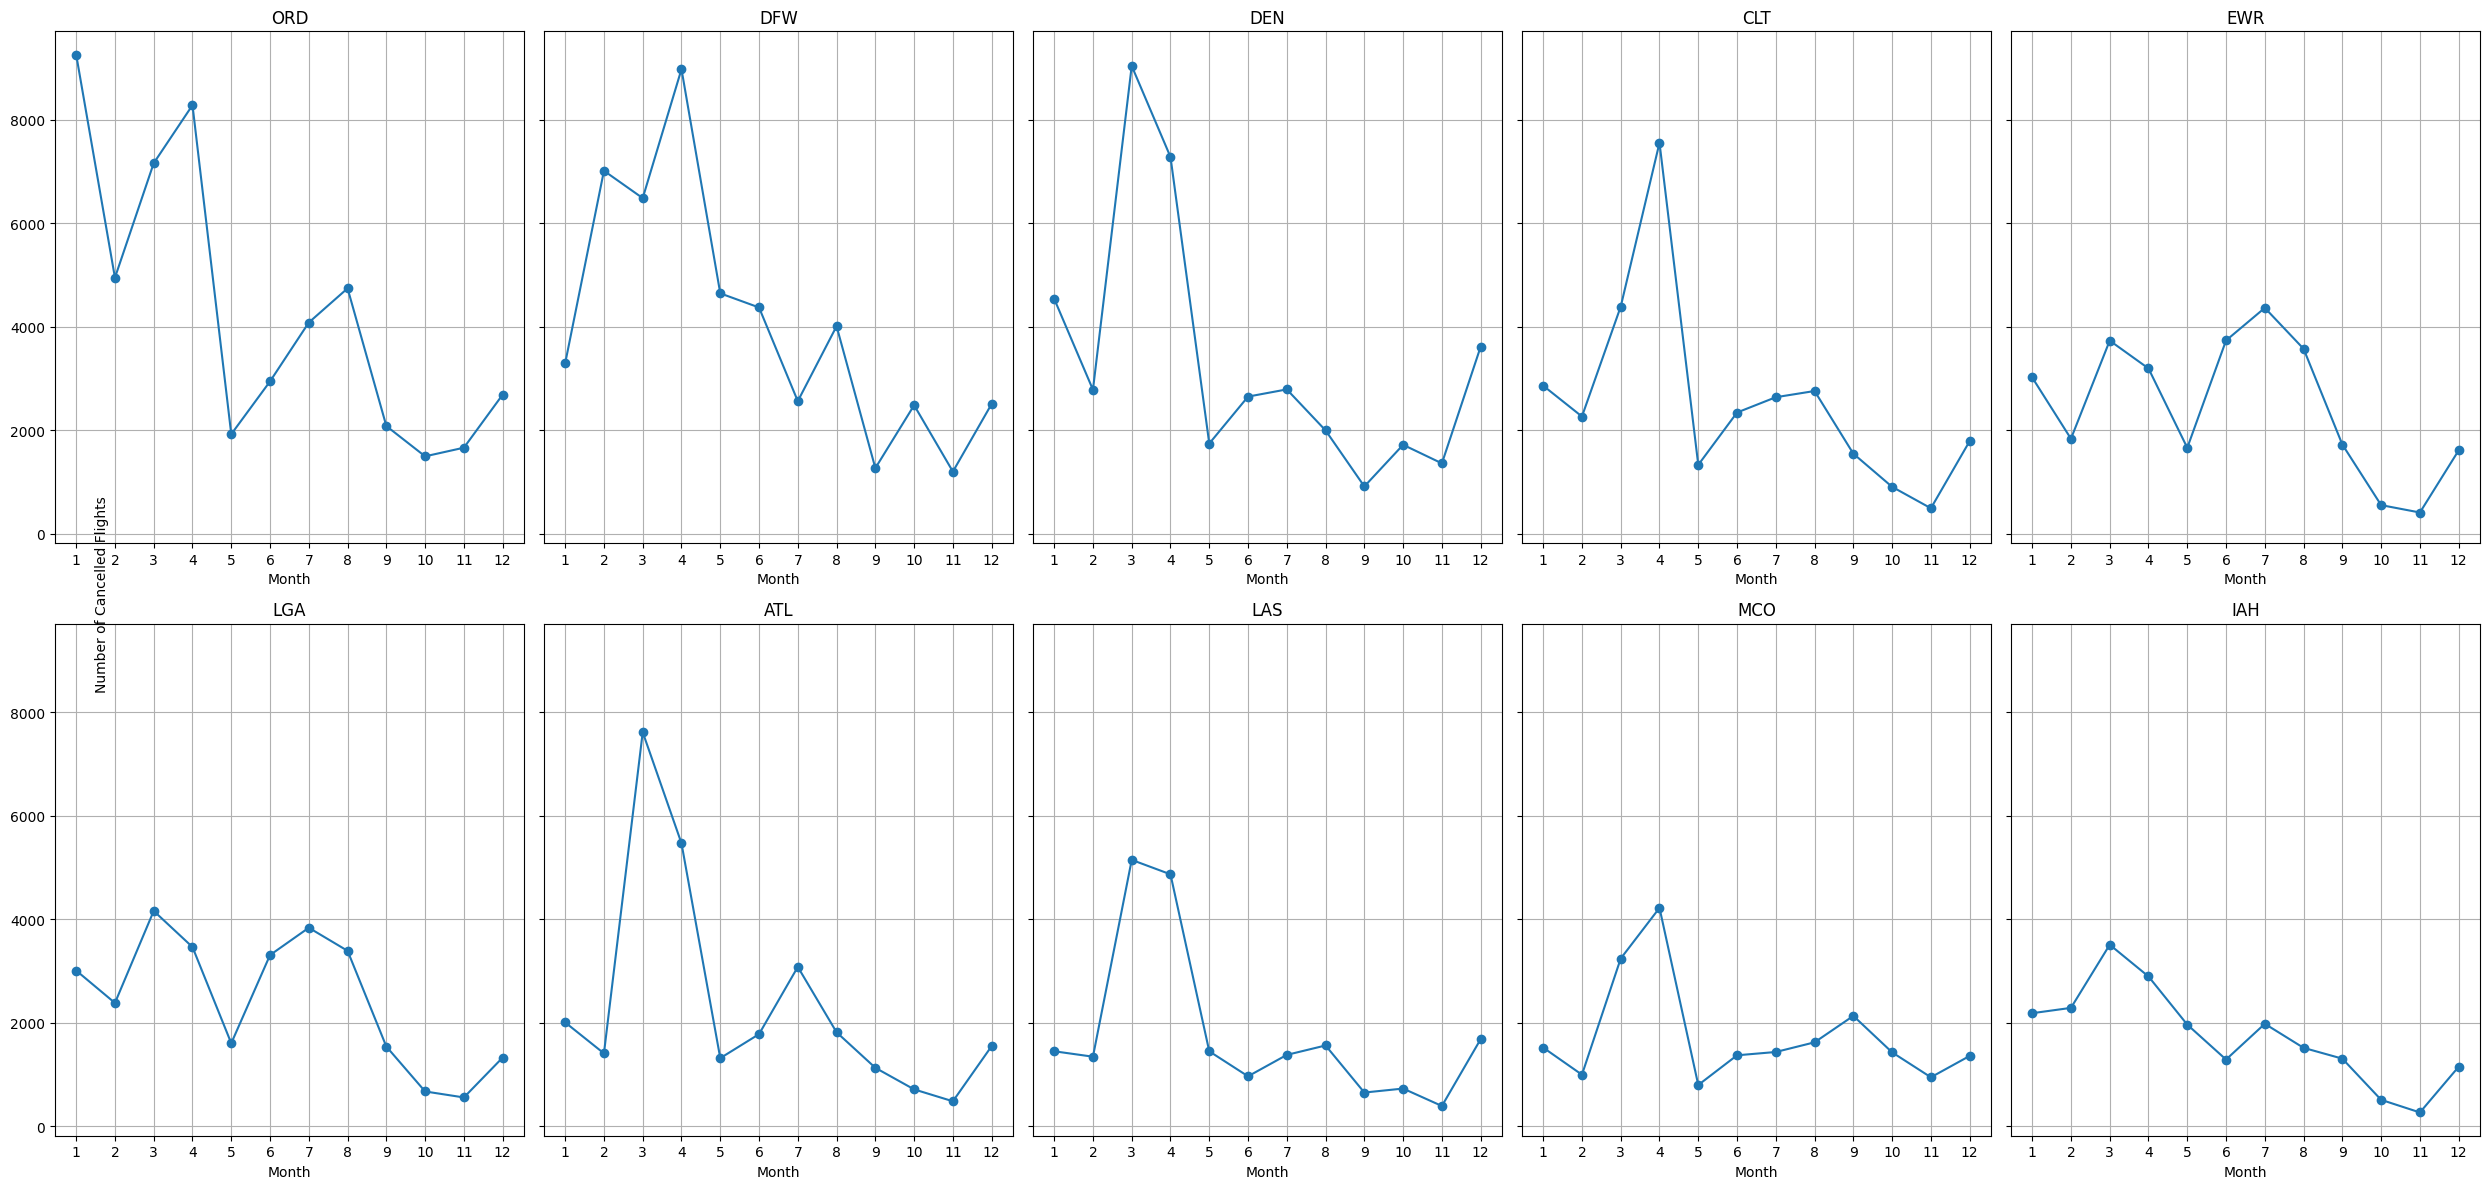

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 10 worst airports
worst_airports = data_24.groupby('airport')['arr_cancelled'].sum().sort_values(ascending=False).head(10).index

# Create subplots with increased width
fig, axes = plt.subplots(2, 5, figsize=(25, 12), sharey=True)  # 2 rows, 5 columns

# Flatten the axes array for easier iteration
axes = axes.flatten()


# Iterate through worst airports and plot
for i, airport in enumerate(worst_airports):
    airport_data = data_24[data_24['airport'] == airport]
    monthly_cancellations = airport_data.groupby('month')['arr_cancelled'].sum()

    axes[i].plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
    axes[i].set_xlabel('Month')
    axes[i].set_title(airport)
    axes[i].grid(True)
    axes[i].set_xticks(range(1, 13))

# Set common y-axis label
fig.text(0.04, 0.5, 'Number of Cancelled Flights', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

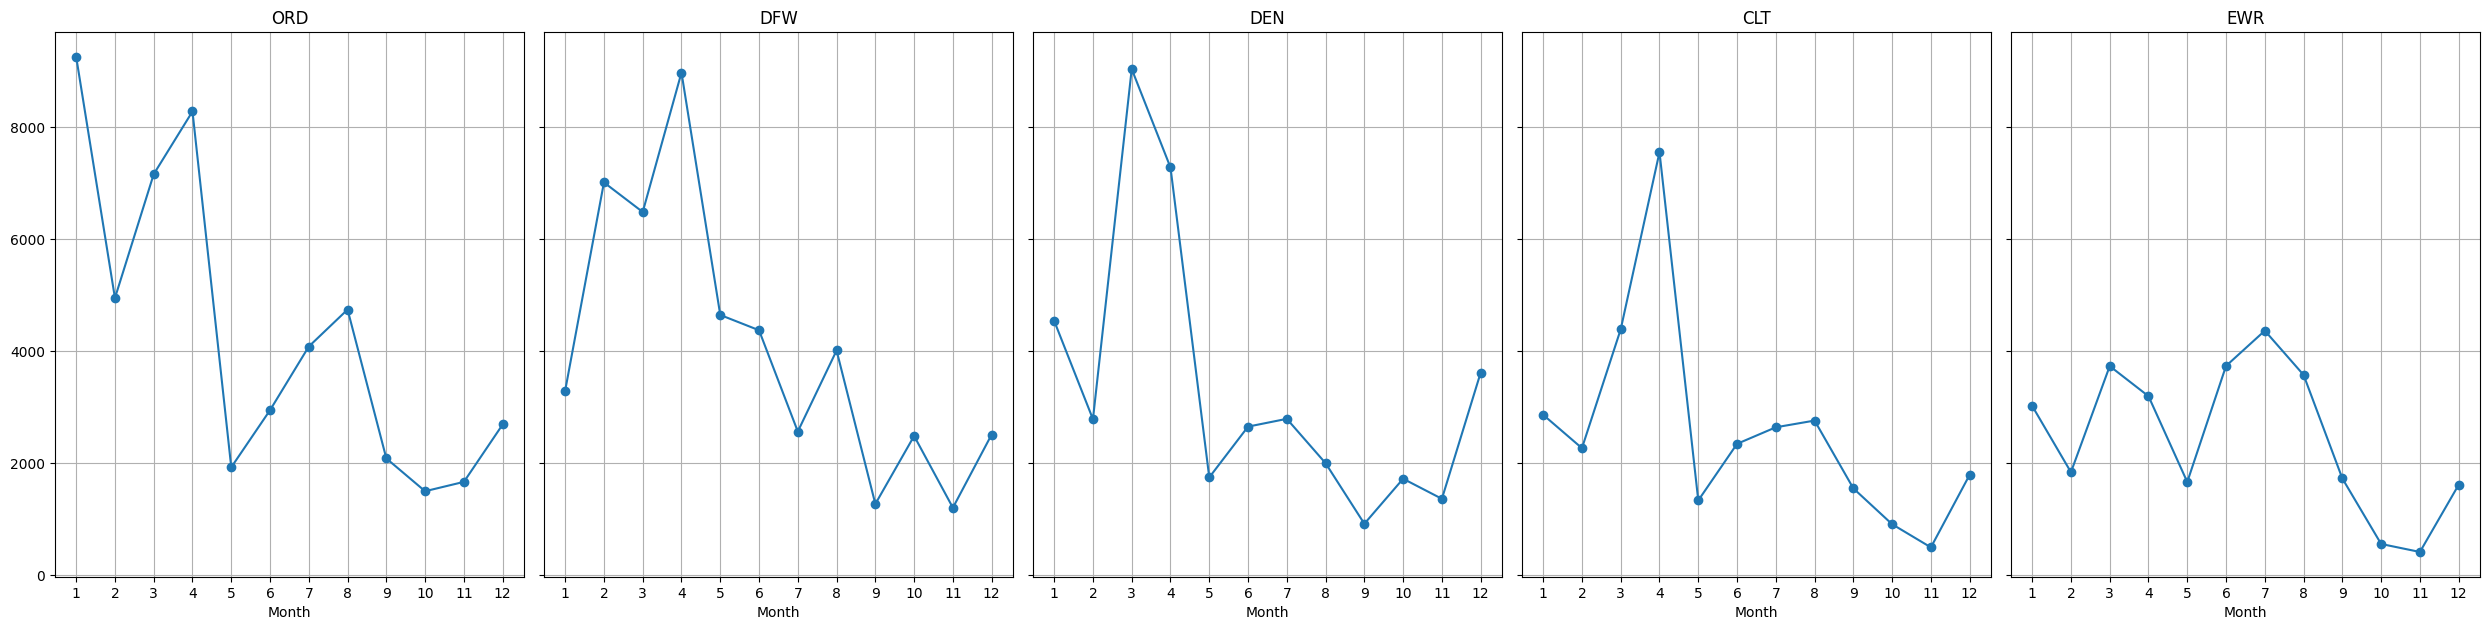

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 10 worst airports
worst_airports = data_24.groupby('airport')['arr_cancelled'].sum().sort_values(ascending=False).head(5).index

num_rows = 2  # Number of rows in the subplot grid
num_cols = 5   # Number of columns in the subplot grid
num_plots = len(worst_airports)  # Total number of plots needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 12), sharey=True)

axes = axes.flatten()  # Flatten the axes array

# Iterate through worst airports and plot
for i, airport in enumerate(worst_airports):
    airport_data = data_24[data_24['airport'] == airport]
    monthly_cancellations = airport_data.groupby('month')['arr_cancelled'].sum()

    axes[i].plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
    axes[i].set_xlabel('Month')
    axes[i].set_title(airport)
    axes[i].grid(True)
    axes[i].set_xticks(range(1, 13))

# Hide any empty subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

# Set common y-axis label
#fig.text(0,'Number of Cancelled Flights', va='center', rotation='vertical')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

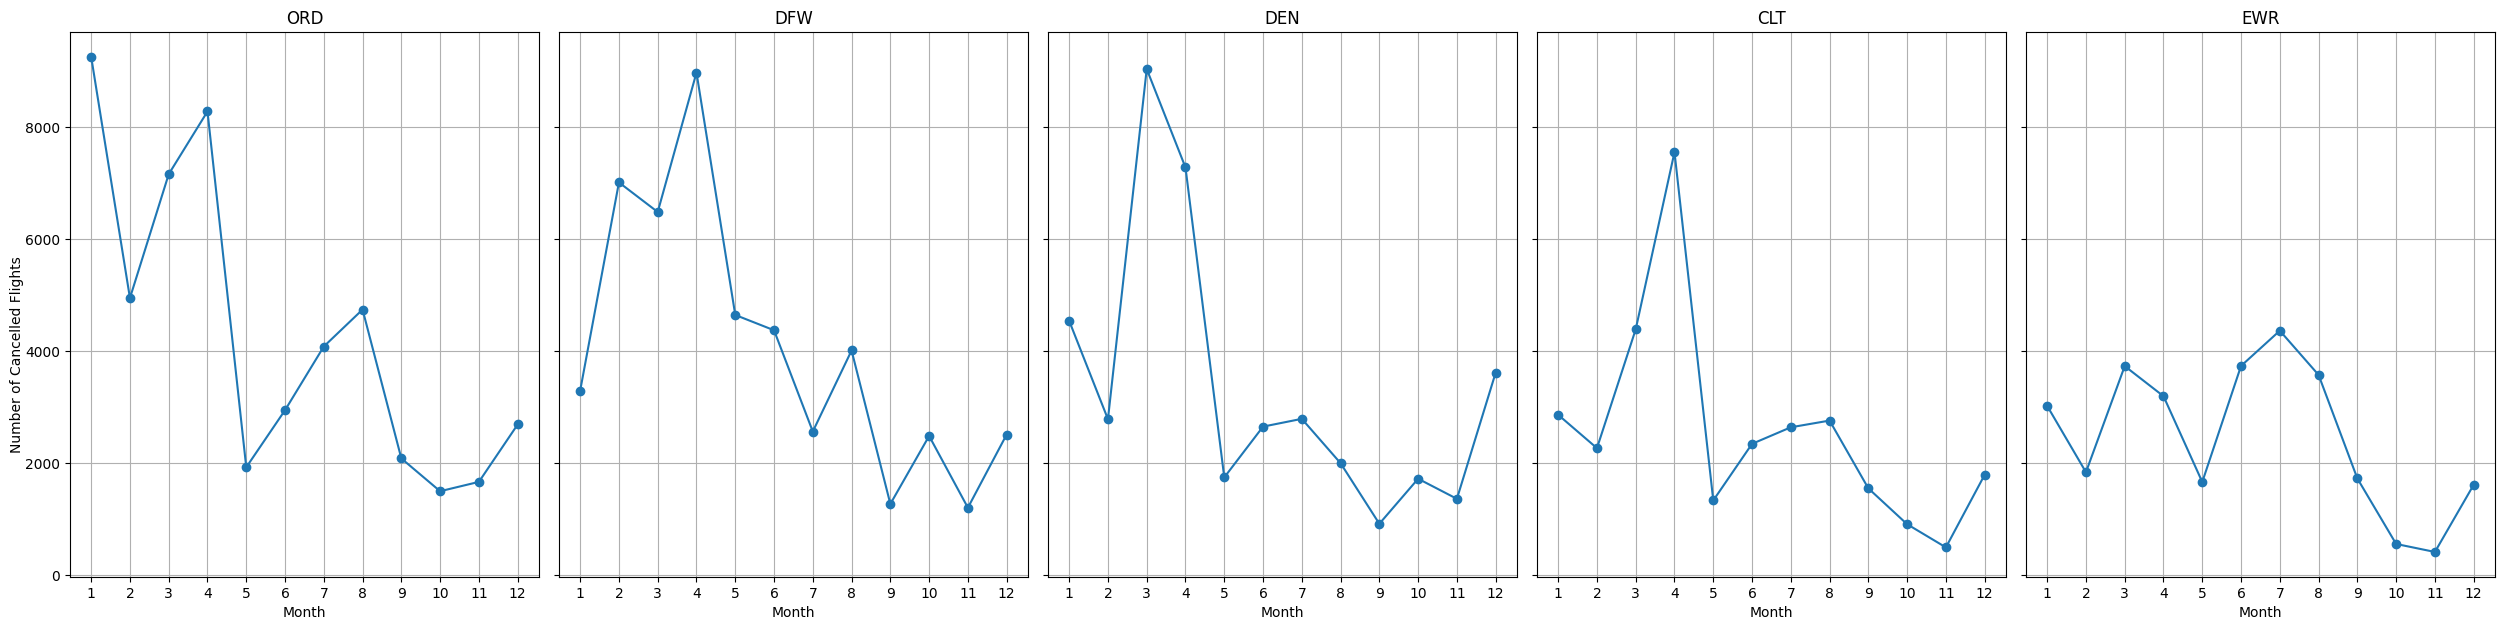

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 5 worst airports
worst_airports = data_24.groupby('airport')['arr_cancelled'].sum().sort_values(ascending=False).head(5).index

num_rows = 2  # Number of rows in the subplot grid
num_cols = 5  # Number of columns in the subplot grid
num_plots = len(worst_airports)  # Total number of plots needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 12), sharey=True)

axes = axes.flatten()  # Flatten the axes array

# Iterate through worst airports and plot
for i, airport in enumerate(worst_airports):
    airport_data = data_24[data_24['airport'] == airport]
    monthly_cancellations = airport_data.groupby('month')['arr_cancelled'].sum()

    axes[i].plot(monthly_cancellations.index, monthly_cancellations.values, marker='o')
    axes[i].set_xlabel('Month')
    axes[i].set_title(airport)
    axes[i].grid(True)
    axes[i].set_xticks(range(1, 13))

# Hide any empty subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

# Set common y-axis label
fig.text(0, 0.7,'Number of Cancelled Flights', va='center', rotation='vertical') # Updated y-axis label placement

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

#Statistical Analysis

#Machine Learning